# Table of Contents
 <p><div class="lev1"><a href="#Introduction-to-Electrochemistry-with-a-focus-on-fuel-cell-reaction"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Electrochemistry with a focus on fuel cell reaction</a></div><div class="lev1"><a href="#Kinetic-of-Electrode-Reactions---Basics"><span class="toc-item-num">2&nbsp;&nbsp;</span>Kinetic of Electrode Reactions - Basics</a></div><div class="lev2"><a href="#Homogeneous-kintetics"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Homogeneous kintetics</a></div><div class="lev2"><a href="#Simple-mass-balance"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Simple mass balance</a></div><div class="lev3"><a href="#A-simple-example"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>A simple example</a></div><div class="lev2"><a href="#Temperature-dependence-of-reaction-rates"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Temperature dependence of reaction rates</a></div><div class="lev1"><a href="#Fuel-Cell-Electrochemistry"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fuel Cell Electrochemistry</a></div><div class="lev1"><a href="#Kinetic-of-Electrode-Reactions---Essential-of-Electrode-Reactions"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kinetic of Electrode Reactions - Essential of Electrode Reactions</a></div><div class="lev2"><a href="#Homogeneous-kintetics"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Homogeneous kintetics</a></div><div class="lev1"><a href="#The-general-redox-couple-description"><span class="toc-item-num">5&nbsp;&nbsp;</span>The general redox couple description</a></div><div class="lev1"><a href="#The-HR-reaction"><span class="toc-item-num">6&nbsp;&nbsp;</span>The HR reaction</a></div><div class="lev2"><a href="#The-Equilibirum-potential"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>The Equilibirum potential</a></div><div class="lev1"><a href="#The-ORR-reaction"><span class="toc-item-num">7&nbsp;&nbsp;</span>The ORR reaction</a></div><div class="lev2"><a href="#The-Equilibirum-potential"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>The Equilibirum potential</a></div><div class="lev1"><a href="#References"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></div><div class="lev1"><a href="#Notebook-Setup"><span class="toc-item-num">9&nbsp;&nbsp;</span>Notebook Setup</a></div>

In [6]:
# My Defaults Latex Packages

import scipy as sp
import pandas as pd
from cycler import cycler, cycle
from IPython.display import IFrame

import pint
u = pint.UnitRegistry()

In [7]:
%matplotlib notebook
import pylab as plt

In [8]:
from IPython.core.display import HTML
def css_styling():
    styles = open("widescreen.css", "r").read()
    return HTML(styles)
css_styling()

In [9]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'sky',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
})


figsize = (16,10)

# Introduction to Electrochemistry with a focus on fuel cell reaction

A general overview over the modeing of electrochmical systems. This material is taken from multiple source like \cite{Kulikovsky2010} and \cite{Bard2000a}.

# Kinetic of Electrode Reactions - Basics

This is a jupyter-notebook section adapted from \cite{Bard2000a}, p.87ff


## Homogeneous kintetics 

In this section we consider the most simplistic chemical reaction: the unimolecular elementary reaction of two substance A and B:
$$
A \mathop{\rightleftharpoons}^{k_f}_{k_b} B
$$

Both forwards and backwards reaction are active at all times with
* forward reaction: $R_f = k_f c_A$
    * $k_f$ forward reaction rate in $[\text{s}^{-1}]$
    * $c_A$ concentration of species A in $[\text{mol} \ \text{m}^{-3}]$
    * $R_f$ rate of the formard reaction in $[\text{mol} \ \text{m}^{-3} \ \text{s}^{-1}]$
* backwar reaction: $R_b = k_b c_B$
    * $k_b$ forward reaction rate in $[\text{s}^{-1}]$
    * $c_B$ concentration of species A in $[\text{mol} \ \text{m}^{-3}]$
    * $R_b$ rate of the formard reaction in $[\text{mol} \ \text{m}^{-3} \ \text{s}^{-1}]$
The net reaction rate of this reaction is defined as
$$
R_\text{net} = k_f c_A - b_f c_B
$$

## Simple mass balance

Assuming perfect mixing of species A and B and a closed system, we can write the mass balance as follows

\begin{align}
\frac{d c_A}{dt} &= -k_f c_A + k_b c_B \\
\frac{d c_B}{dt} &= \ k_f c_A - k_b c_B \\
\end{align}

This coupled system of ordinary differential equations is at equilibrium $\frac{d c_A}{dt}=\frac{d c_A}{dt}=0$ when the net reaction rate is zere, i.e. if
$$
\frac{k_f}{k_b} = \frac{c_B}{c_A}
$$
At equlibrium, the matchinc individual reaction rates of the forwards and the backwards reaction is called exchange velocity $v_0$ or $R_0$.

### A simple example

Assume $k_f=1 \text{s}^{-1}$ and $k_b=2 \text{s}^{-1}$. This system will be at equilibrium if $c_A = 2 c_B$.

For everthing else, we have to solve the following system of ordinary differential equations

\begin{align}
\frac{d}{dt}
\begin{pmatrix}
c_A \\ c_B
\end{pmatrix}
&=
\begin{pmatrix}
-k_f c_A + k_b c_B\\
 k_f c_A - k_b c_B
\end{pmatrix}
\end{align}

<IPython.core.display.Javascript object>


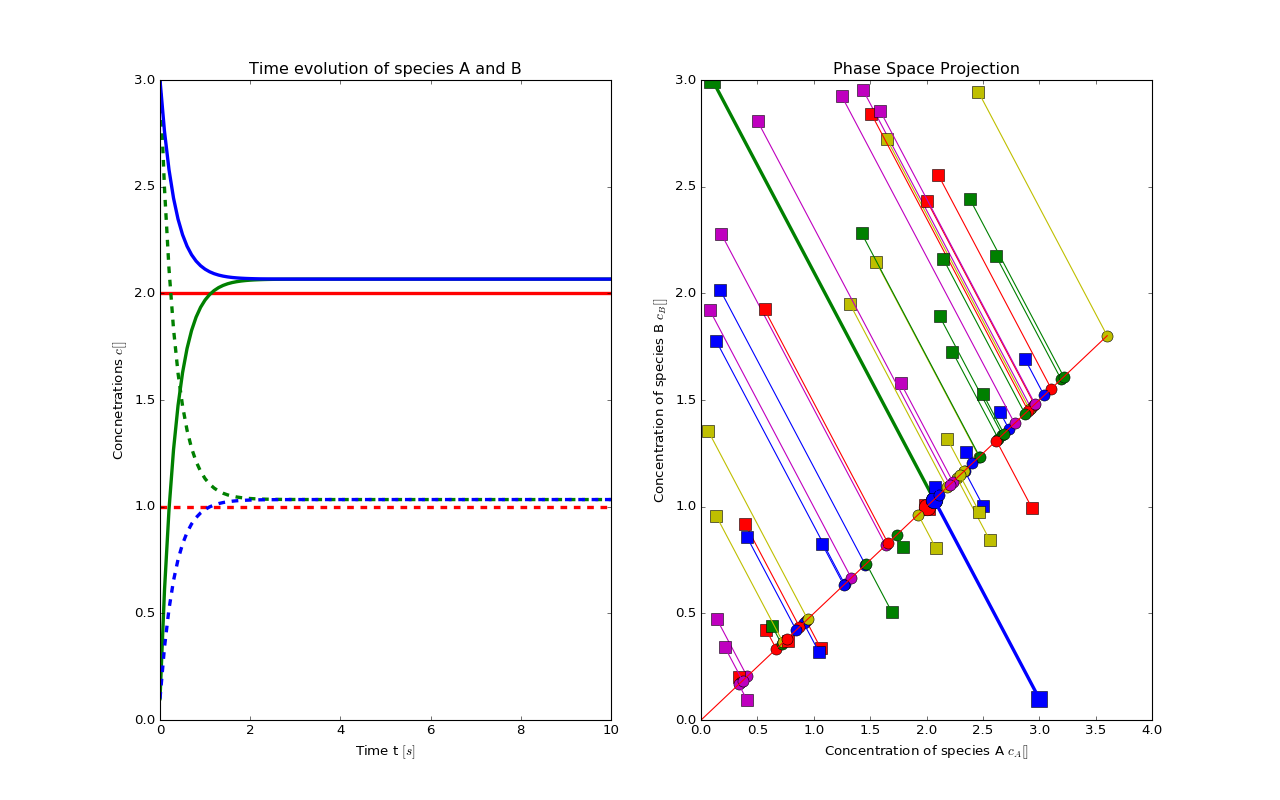

In [10]:
from scipy.integrate import odeint
def react01(y,t,k_f=1,k_b=2):
    r"""
    Simple chemical reaction equation
    """
    dydt = [-k_f*y[0]+k_b*y[1],+k_f*y[0]-k_b*y[1]]
    return dydt

plt.figure(figsize=figsize)
# Documentation on the cylcers can be found at http://matplotlib.org/cycler/
color_cycle = cycler(c=['r', 'g', 'b','m','y'])
ls_cycle = cycler('ls', ['-', '--'])
lw_cycle = cycler('lw', range(1, 4))
sty_cycle = color_cycle

y0list = [[2,1],[0.1,3],[3,0.1]]
t = sp.linspace(0, 10, 101)
xmin=0;xmax=0

for i, sty in zip(range(0, len(y0list)), cycle(color_cycle)):

    y0 = y0list[i]
    sol = odeint(react01, y0, t)

    plt.subplot(1,2,1)
    plt.plot(t,sol[:,0],linewidth=3,**sty)
    plt.plot(t,sol[:,1],'--',linewidth=3,**sty)
    plt.title('Time evolution of species A and B')
    plt.xlabel('Time t $[s]$')
    plt.ylabel('Concnetrations $c []$')
    
    plt.subplot(1,2,2)
    plt.plot(sol[0,0],sol[0,1],'s',linewidth=3,**sty,markersize=15)
    plt.plot(sol[-1,0],sol[-1,1],'o',linewidth=3,**sty,markersize=15)
    plt.plot(sol[:,0],sol[:,1],linewidth=3,**sty)
    plt.title('Phase Space Projection')
    plt.xlabel('Concentration of species A $c_A []$')
    plt.ylabel('Concentration of species B $c_B []$')
    
    xmin=min(xmin,sol[:,0].min()); xmax=max(xmax,sol[:,0].max())
    
for i, sty in zip(range(0, 50), cycle(color_cycle)):

    y0 = 3*sp.rand(2)
    sol = odeint(react01, y0, t)
    xmin=min(xmin,sol[:,0].min()); xmax=max(xmax,sol[:,0].max())
    
    plt.subplot(1,2,2)
    plt.plot(sol[0,0],sol[0,1],'s',linewidth=1,**sty,markersize=10)
    plt.plot(sol[-1,0],sol[-1,1],'o',linewidth=1,**sty,markersize=10)
    plt.plot(sol[:,0],sol[:,1],linewidth=1,**sty)
    plt.xlabel('Concentration of species A $c_A []$')
    plt.ylabel('Concentration of species B $c_B []$')
    

x=sp.linspace(xmin,xmax,100)
y=0.5*x
plt.subplot(1,2,2)
plt.plot(x,y,'r-')



## Temperature dependence of reaction rates

Source [2],p.88

Svante Arrhenius proposed the following relationship in 1889 for the temperature depende of reaction rates (see https://en.wikipedia.org/wiki/Arrhenius_equation):

$$
k = A\exp\left(-\frac{E_A}{R_g \ T} \right)
$$

where
* $E_A$ has been defined as the *activation energy*, as it is formulaic similar to the propabalistic process to overcome an energy barrier of height $E_A$ at a given thermal energy state. The units of $E_A$ are
  $J$.
* $T$ is the temperature in $\text{K}$
* $A$ is called the *frequency factor*, as it is formulaic similar to the frequency of attempts to break the energy barrier.
* $R_g= 8.31447\text{J}\ \text{mol}^{-1} \ \text{K}^{-1}$ is the universal gas constant

<IPython.core.display.Javascript object>


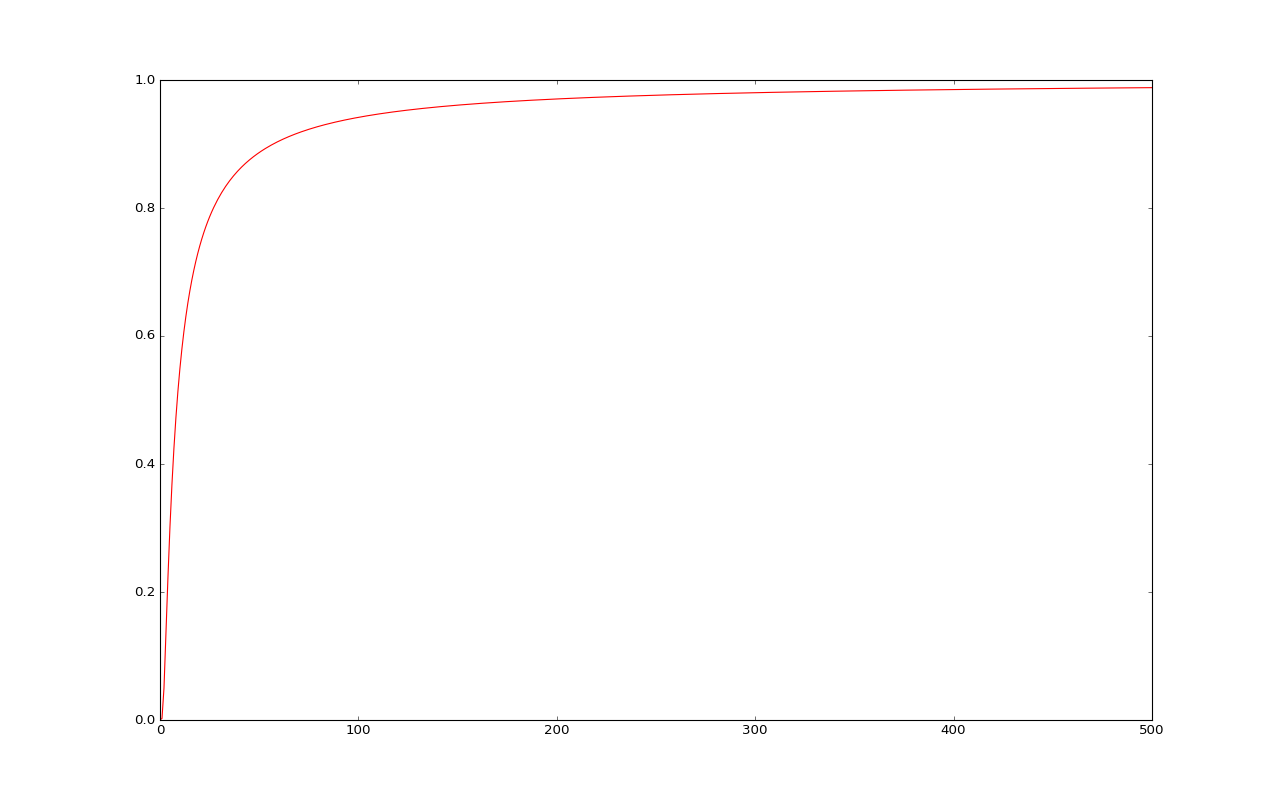

In [11]:
T = sp.linspace(0,500,500)
plt.figure(figsize=figsize)
plt.plot(T, sp.exp(-50/T/8.31447),'r')

In [13]:
IFrame('https://en.wikipedia.org/wiki/Arrhenius_equation', width='100%', height=500)

# Fuel Cell Electrochemistry
Following \cite{Kulikovsky2010}.

\begin{definition} 
\label{def:FuelCellReactions}
Let us consider the fundamental system of chemical and electrochemical reations within a fuel cell.

We want to combust hydrogen in such a way that electrical power is produced. The hydrogen-oxygen combustion can be denoted as

\begin{equation}
\label{eq:H2O2combustion}
2H_2 + O_2 \rightleftharpoons 2H_2O
\end{equation}
where $k_f >> k_b$

This reaction can be split into two half cell raction
* Anodic:
  \begin{equation}
    \label{eq:H2O2combustion}
    2H_2 \rightleftharpoons 4H^+ + 4e^-
  \end{equation}
* Cathodic
  \begin{equation}
    \label{eq:H2O2combustion}
    O_2 + 4H^{+} + 4e^- \rightleftharpoons 2 H_2O
  \end{equation}


\end{definition}

\begin{textboxa}
This is the basic system of reation within a fuel cell.
\end{textboxa}


In [ ]:
\b

# Kinetic of Electrode Reactions - Essential of Electrode Reactions

This is a jupyter-notebook section adapted from [2], p.91ff


## Homogeneous kintetics 

In this section we consider a redox couple transferring $n$ electrons
$$
O + ne^-  \mathop{\rightleftharpoons}^{k_f}_{k_b} R
$$

For an electrode reaction like above, the equilibrium is characterized by the Nernst equation. The Nernst equation links the electrode potential to the bulk concentration of the reactants:

\begin{align}
E_\text{Nernst} \equiv E^\text{eq}_{O,R} &= E^{0',\text{M}}_{O,R} + \frac{R_g \ T}{nF} \ln \left( \frac{c_O^\text{bulk}}{c_R^\text{bulk}} \right) & & \text{see [2],p91,Eq.3.2.2} \\
                                         &= E^{0',\text{M}}_{O,R} + \frac{R_g \ T}{nF} \ln \left( \frac{x_O^\text{bulk}}{x_R^\text{bulk}} \right) & & \text{using } c_i = x_i c \\
                                         &= E^{0',\text{M}}_{O,R} + \frac{R_g \ T}{nF} \ln \left( \frac{x_O^\text{bulk}}{x_R^\text{bulk}} \right) & & \text{using } c_i = p_i \frac{c}{p}
\end{align}

where
* $E^{0',\text{M}}_{O,R}$ is the formal potential, unit $[\text{V}]$
* $c_i^\text{bulk}$ are the bulk concentration of species i (for conversion see https://en.wikipedia.org/wiki/Molar_concentration)
* $x_i$ are the molar fractions of species i
* $p_i$ are the partial pressures of species i (for conversion see https://en.wikipedia.org/wiki/Partial_pressure)
* $F=96485.33289 \text{C} \ \text{mol}^{−1}$

<IPython.core.display.Javascript object>


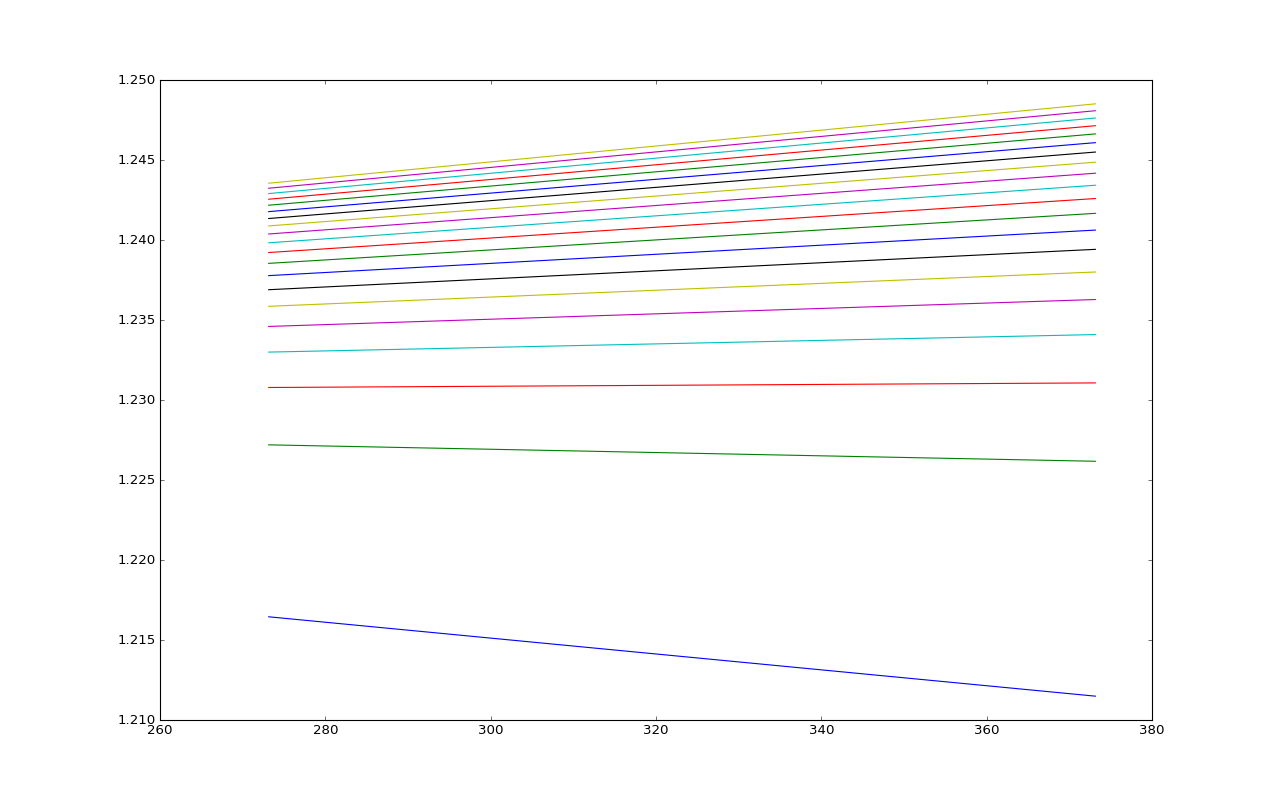

In [12]:
F = 96485.33289
R = 8.31447
E0_OR_Eq = 1.23
n=4

plt.figure(figsize=figsize)
c_r = sp.linspace(0.1,10,20)
T = sp.linspace(273.15,273.15+100)

for c in c_r:
    E = E0_OR_Eq + R*T/(n*F)*sp.log(c)
    plt.plot(T,E)

# The general redox couple description

$$
R \rightleftharpoons_{k_f} O + ne^{-}
$$

# The HR reaction

The hydrogen reaction is deonted as
$$ 2H^+ + 2e^- \rightleftharpoons H_2 $$

The reaction rates can be described by a concentration corrected Buler-Volmer equation. How the concentration dependance is correctly derived and calculated is currently unknown to AFCC.

Typically the first term in the reaction equation should denote the formward reaction and the second the backwards reaction. It seems that this is the opposite in this paper.

This means:
 * $E<E_\text{eq}$: forwards reaction
 * $E>E_\text{eq}$: backwards reaction

## The Equilibirum potential

The equilibrium potential of the hydrogen electrode $E^\text{eq}_{H^+,H_2}$ is given by

\begin{align}
E^\text{eq}_{H^+,H_2} &= E^{0,\text{M}}_{H^+,H_2} 
                      + \frac{R_gT}{F} 
                        \ln \left( \frac{a_{H^+}}{\tilde p_{H_2}^{0.5}}  \right) 
                      & & \text{[1],p.2}\\
                      &= E^{0,\text{M}}_{H^+,H_2} 
                      + \frac{R_gT}{F} 
                        \ln \left( \frac{a_{H^+}}{x_{H_2}^{0.5}}  \right)
                      & & \text{Used usual notation for the mole fraction}
\end{align}

where
* $x_{H_2}=\tilde p_{H_2}$ denotes the mole fraction of hydrogen (see https://en.wikipedia.org/wiki/Partial_pressure)
* $a_{H^+}$ denotes the activity of protons
* $E^{0,\text{eq}}_{H^+,H_2}$ denotes the standard equilibrium potential of the HOR on a metal M (in most cases Pt):
  $$
  E^{0,\text{M}}_{H^+,H_2} = \frac{2\mu_{H^+}^{0,s} + 2\mu_{e^-}^{0,M} - \mu_{H_2}^{0,g}}{2F}
  $$
  It is a wideley used electrochemical convention, to define this potential as the zereo reference:
  $$
  E^{0,\text{M}}_{H^+,H_2} = E_\text{SHE} = 0
  $$

# The ORR reaction

In this section we follow \cite{Kulikovsky2010}, p4ff closely. I will attempt to make the notation consistent.

Th oxygen redux reaction is deonted as
$$ O_2^+ + 4e^- + 4H^+ \to 2H_2O $$

The reaction rates can be described by a concentration corrected Buler-Volmer equation. How the concentration dependance is correctly derived and calculated is currently unknown to AFCC.

The r_14 function implements the ORR reactin, with the assumption that a positive current density denotes the forward direction. The notation in the paper seems a bit weird. 

Typically the first term in the reaction equation should denote the formward reaction and the second the backwards reaction. It seems that this is the opposite in this paper.

This means:
 * $E<E_\text{eq}$: forwards reaction
 * $E>E_\text{eq}$: backwards reaction

The ORR Reaction at equilibrium condition

## The Equilibirum potential

The equilibrium potential of the hydrogen electrode $E^\text{eq}_{H^+,H_2}$ is given by

\begin{align}
E^\text{eq}_{O_2,H^+} &= E^{0,\text{M}}_{O_2,H^+} 
                      + \frac{R_gT}{F} 
                        \ln \left( \frac{a_{H^+} \tilde p_{O_2}^{1/4}}{a_{H_2O}^{0.5}}  \right) 
                      & & \text{[1],p.3}\\
                      &= E^{0,\text{M}}_{O_2,H^+} 
                      + \frac{R_gT}{F} 
                        \ln \left( \frac{a_{H^+} x_{O_2}^{1/4}}{a_{H_2O}^{0.5}}  \right) 
                      & & \text{Notation more consistent}\\
\end{align}

where
* $x_{O_2}=\tilde p_{O_2}$ denotes the mole fraction of hydrogen (see https://en.wikipedia.org/wiki/Partial_pressure)
* $a_{H^+}$ denotes the activity of protons
* $a_{H_2O}$ denotes the activity of water. [1] assumes water to be produced in liquid form, hence 
  $a_{H_2O}=1$
* $E^{0,\text{M}}_{O_2,H^+}$ denotes the standard equilibrium potential of the ORR on a metal M (in most cases Pt):
  $$
  E^{0,\text{M}}_{O_2,H^+} = \frac{\mu_{O_2}^{0,g} + 4\mu_{H_2}^{0,s} + 4\mu_{e^-}^{0,M} - 2\mu_{H_2O}^{0,l}}{4F}
  $$
  Relative to ths standard hydrpgen electrode SHE, the standard equilibrium potentail of the ORR is
  $$
  E^{0,\text{M}}_{O_2,H^+} = 1.23 V
  $$

# References

[<a id="cit-Kulikovsky2010" href="#call-Kulikovsky2010">Kulikovsky2010</a>] Andrei A. Kulikovsky, ``_Analytical Modelling of Fuel Cells_'',  2010.

[<a id="cit-Bard2000a" href="#call-Bard2000a">Bard2000a</a>] Allen J. Bard and Larry R. Faulkner, ``_Electrochemical Methods - Fundamentals and Applications_'',  2000.  [online](http://ca.wiley.com/WileyCDA/WileyTitle/productCd-0471043729.html)



# Notebook Setup

pip install https://github.com/ipython-contrib/IPython-notebook-extensions/archive/master.zip